### Shots/ Goals Creator

This graph shows the best playmakers in the premier league this season

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cr = pd.read_excel('creator.xlsx', header=1)

In [3]:
cr

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,...,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,22-009,2000,19.0,23,1.21,...,0,4,0.21,4,0,0,0,0,0,Matches
1,2,Che Adams,sct SCO,FW,Southampton,25-184,1996,9.9,20,2.01,...,1,2,0.20,1,0,0,0,0,1,Matches
2,3,Rayan Aït Nouri,fr FRA,DF,Wolves,20-221,2001,8.0,15,1.88,...,1,1,0.13,0,1,0,0,0,0,Matches
3,4,Kristoffer Ajer,no NOR,DF,Brentford,23-271,1998,7.3,7,0.96,...,0,0,0.00,0,0,0,0,0,0,Matches
4,5,Nathan Aké,nl NED,DF,Manchester City,26-329,1995,6.5,0,0.00,...,0,0,0.00,0,0,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,479,Wilfried Zaha,ci CIV,FW,Crystal Palace,29-064,1992,15.5,51,3.30,...,0,6,0.39,5,0,1,0,0,0,Matches
479,480,Oleksandr Zinchenko,ua UKR,DF,Manchester City,25-029,1996,5.6,16,2.84,...,0,3,0.53,3,0,0,0,0,0,Matches
480,481,Hakim Ziyech,ma MAR,"FW,MF",Chelsea,28-300,1993,6.1,30,4.91,...,1,4,0.65,3,0,1,0,0,0,Matches
481,482,Kurt Zouma,fr FRA,DF,West Ham,27-078,1994,10.8,2,0.19,...,0,0,0.00,0,0,0,0,0,0,Matches


In [4]:
cr = cr[['Rk', 'Player', 'Pos', 'Squad', '90s', 'SCA', 'SCA90', 'GCA','GCA90']] # Keep only relevant columns

In [5]:
cr = cr[cr['90s']>=10] # Select only players who have played 10 full games or more

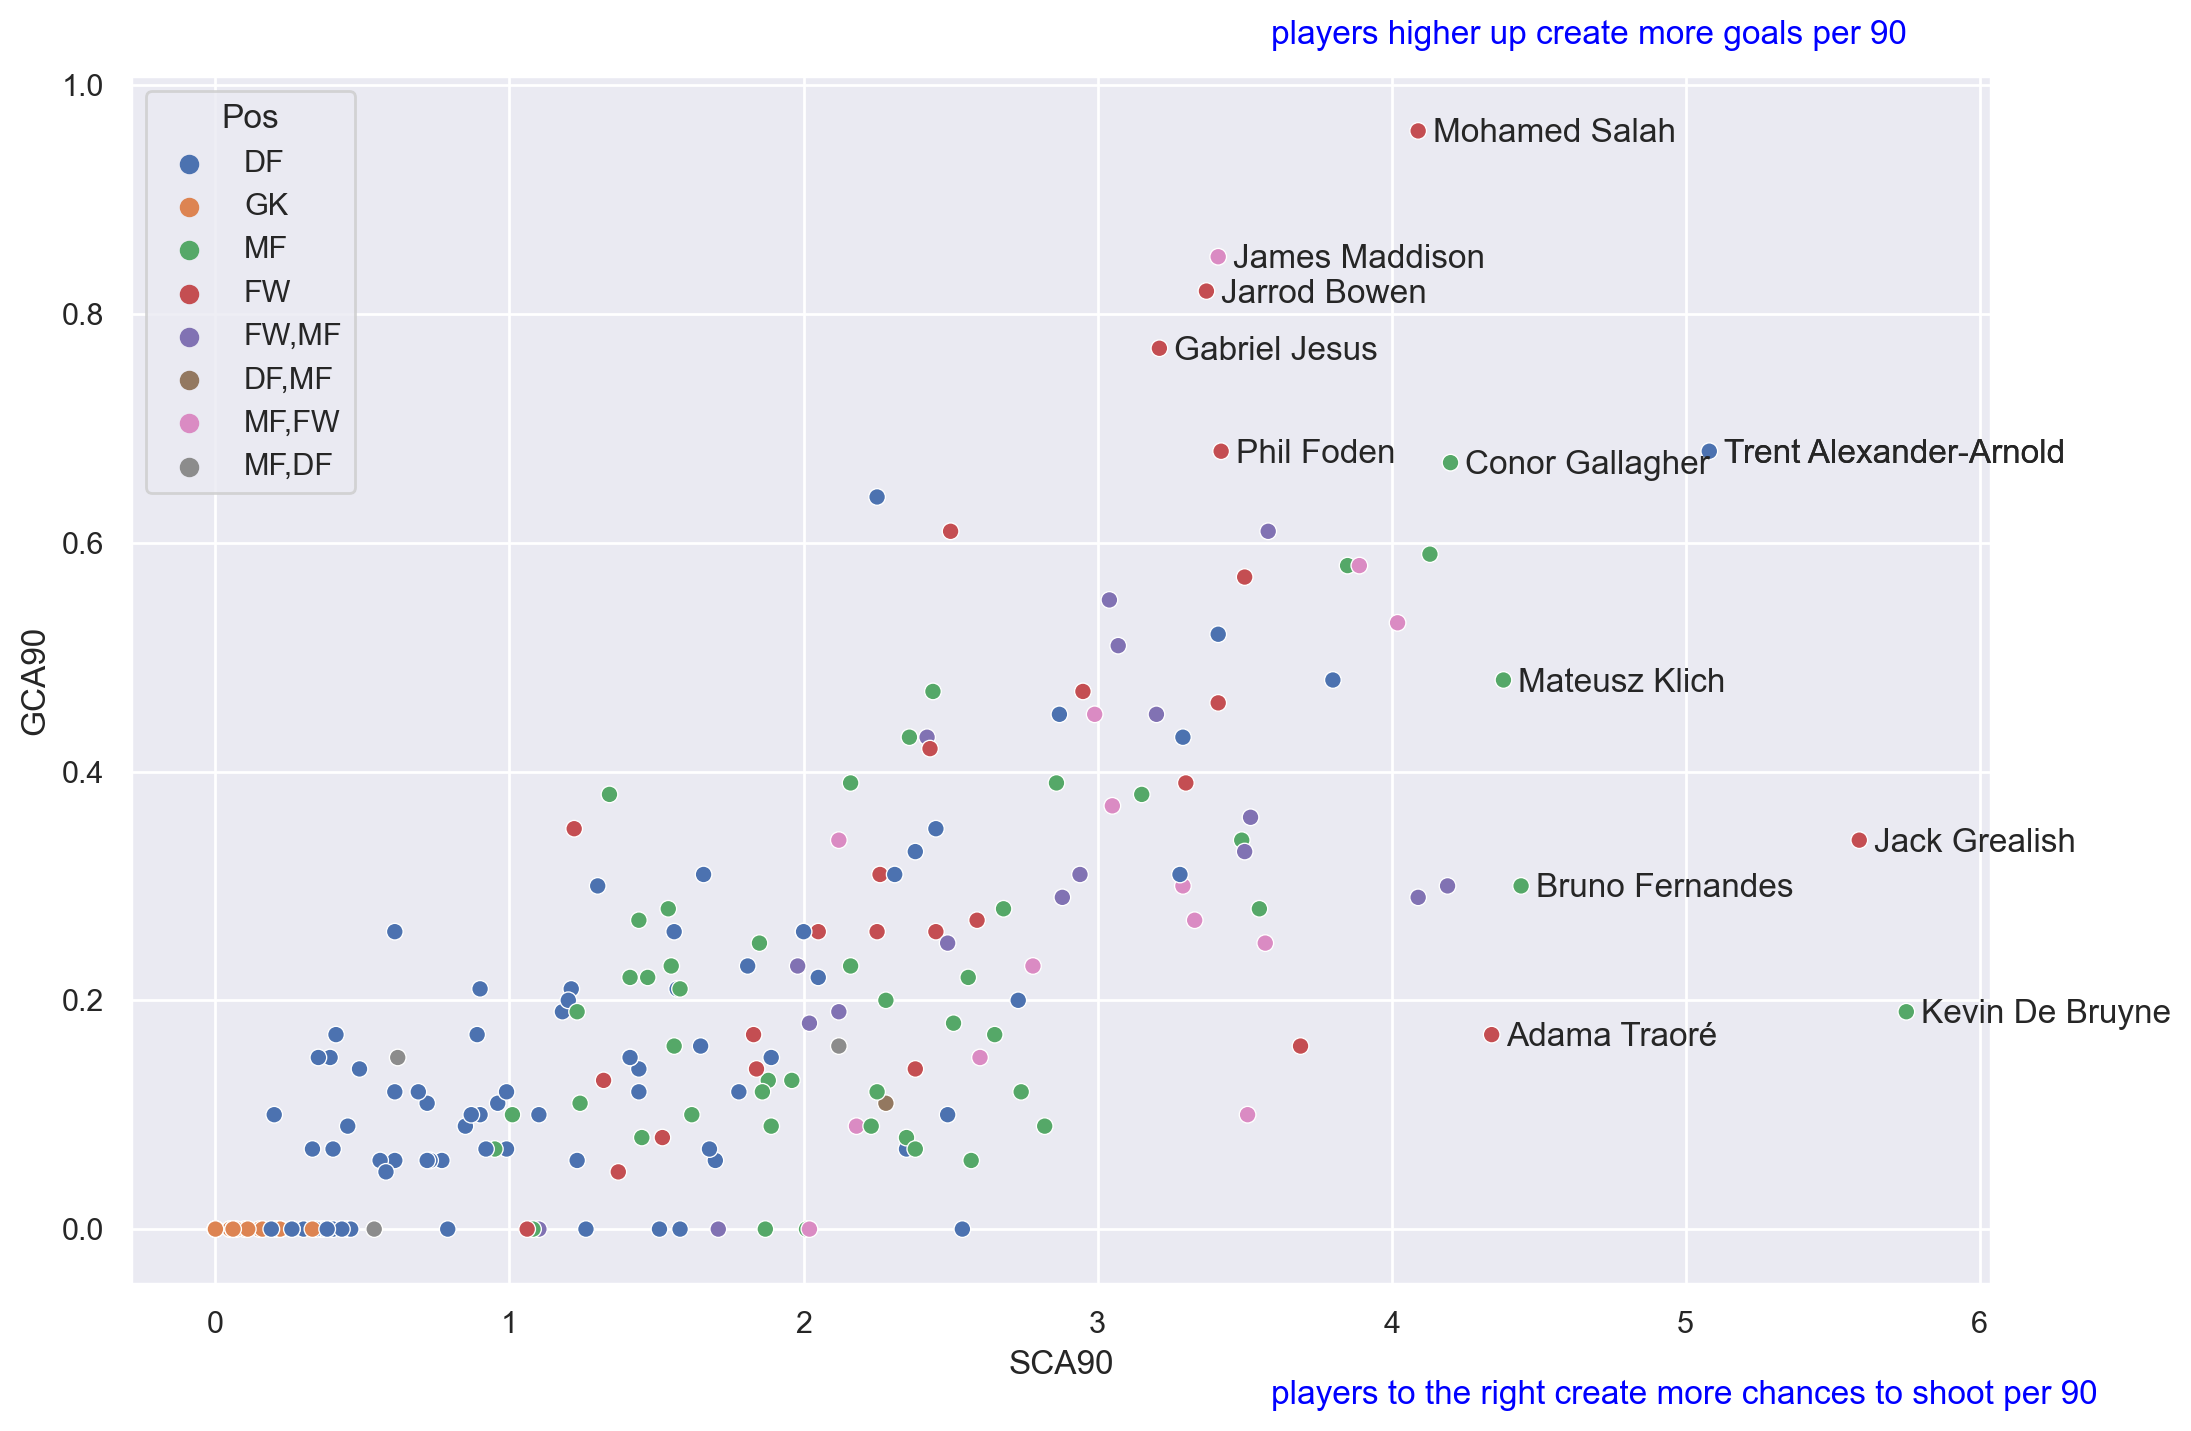

In [6]:
fig = plt.figure(figsize=(12,8), dpi=200)

sns.set_theme()
ax = sns.scatterplot(data=cr, x='SCA90',y='GCA90', hue='Pos')
sns.move_legend(ax, loc='upper left')

top_players = [x for x in cr.sort_values('SCA90', ascending=False)['Player'].head(7)]
top_players = top_players + [x for x in cr.sort_values('GCA90', ascending=False)['Player'].head(6)]
for player in top_players:
    plt.text(x=cr['SCA90'][cr['Player']==player]+0.05, 
             y=cr['GCA90'][cr['Player']==player]-0.01,
             s=player)
plt.text(x=0.6,y=0.05,transform=fig.transFigure,
         s = 'players to the right create more chances to shoot per 90', color='blue')
plt.text(x=0.6,y=0.9,transform=fig.transFigure,
         s = 'players higher up create more goals per 90', color='blue')
fig.savefig('creator.png')

Trent Alexander-Arnold as a right back has impressively high amount of Shots and Goals creating actions

### Shooting Performance

This graph shows players that shoots most often and who are clinical vs. wasteful in front of goal.

In [7]:
st = pd.read_excel('finisher.xlsx', header=1)

In [8]:
st

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,22-009,2000,19.0,0,9,...,20.2,0,0,0,0.6,0.6,0.06,-0.6,-0.6,Matches
1,2,Che Adams,sct SCO,FW,Southampton,25-184,1996,9.9,4,22,...,14.5,0,0,0,2.7,2.7,0.12,1.3,1.3,Matches
2,3,Rayan Aït Nouri,fr FRA,DF,Wolves,20-221,2001,8.0,0,6,...,15.1,0,0,0,0.3,0.3,0.05,-0.3,-0.3,Matches
3,4,Kristoffer Ajer,no NOR,DF,Brentford,23-271,1998,7.3,0,2,...,9.9,0,0,0,0.2,0.2,0.09,-0.2,-0.2,Matches
4,5,Nathan Aké,nl NED,DF,Manchester City,26-329,1995,6.5,1,2,...,6.0,0,0,0,0.3,0.3,0.14,0.7,0.7,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,479,Wilfried Zaha,ci CIV,FW,Crystal Palace,29-064,1992,15.5,5,26,...,19.0,0,2,2,3.5,1.9,0.07,1.5,1.1,Matches
479,480,Oleksandr Zinchenko,ua UKR,DF,Manchester City,25-029,1996,5.6,0,5,...,23.4,0,0,0,0.1,0.1,0.03,-0.1,-0.1,Matches
480,481,Hakim Ziyech,ma MAR,"FW,MF",Chelsea,28-300,1993,6.1,1,27,...,18.7,1,0,0,2.5,2.5,0.09,-1.5,-1.5,Matches
481,482,Kurt Zouma,fr FRA,DF,West Ham,27-078,1994,10.8,1,4,...,5.6,0,0,0,0.3,0.3,0.08,0.7,0.7,Matches


In [9]:
st = st[['Rk', 'Player', 'Pos', 'Squad', '90s',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist',
       'npxG/Sh', 'G-xG', 'np:G-xG']] # Keep only relevant columns

In [10]:
st = st[st['90s']>=10] # Select only players who have played 10 full games or more

Text(0.1, 0.9, 'players with darker coloured dots take shots at longer distance')

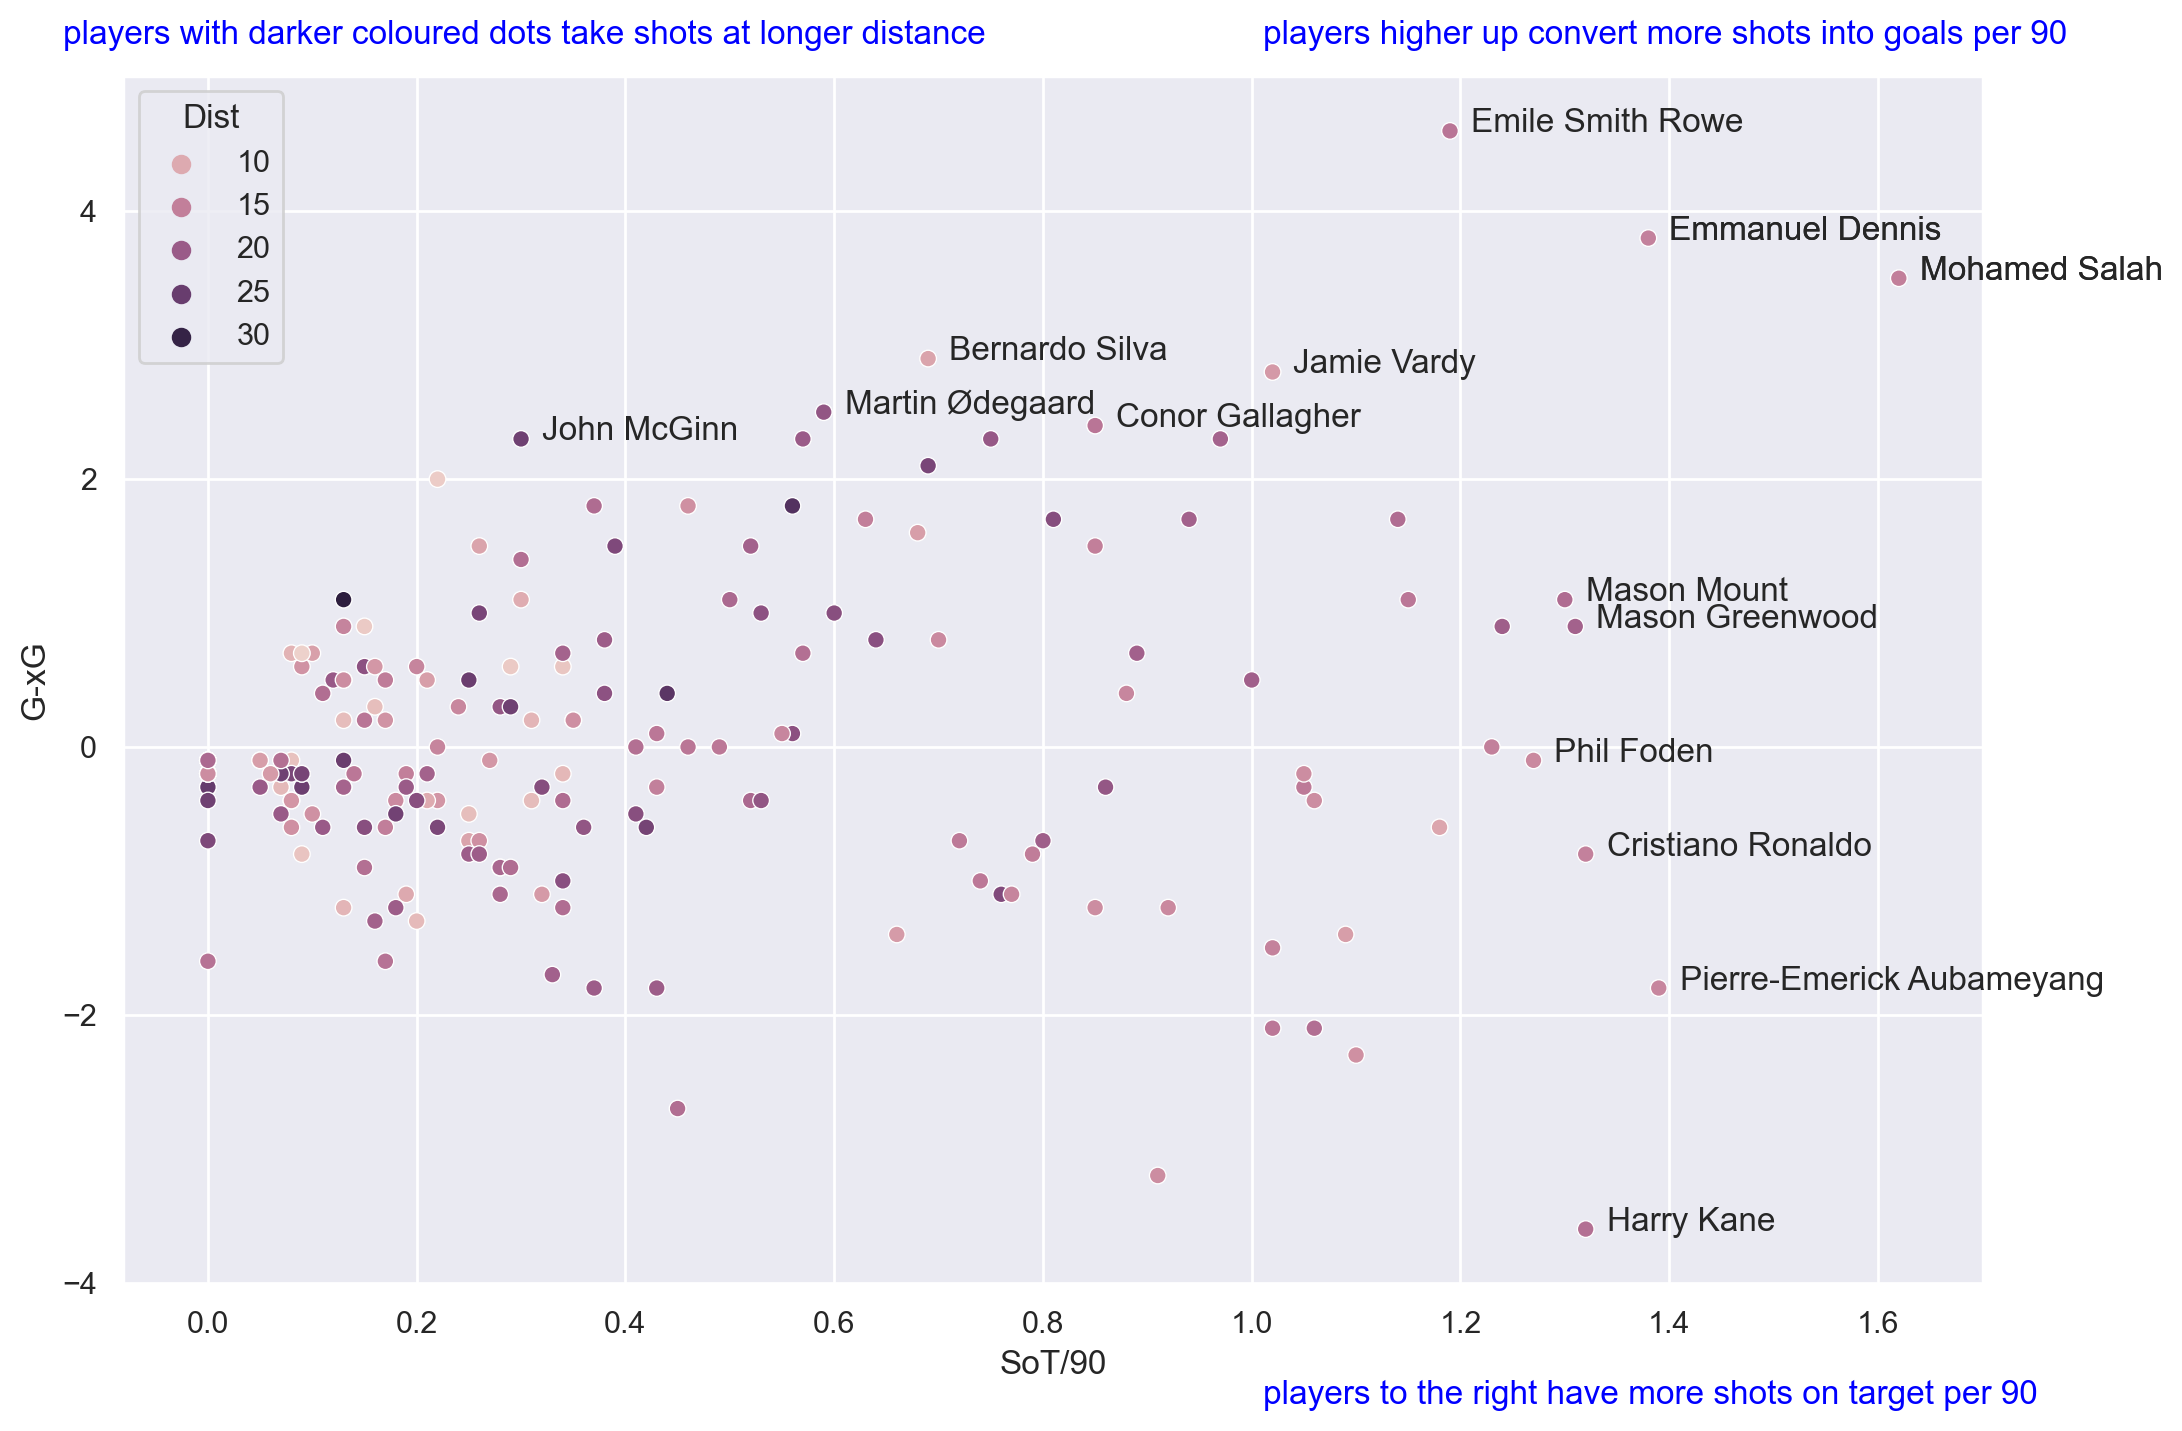

In [11]:
fig = plt.figure(figsize=(12,8), dpi=200)

sns.set_theme()
ax = sns.scatterplot(data=st, x='SoT/90',y='G-xG', hue='Dist')
sns.move_legend(ax, loc='upper left')

top_players = [x for x in st.sort_values('SoT/90', ascending=False)['Player'].head(8)]
top_players = top_players + [x for x in st.sort_values('G-xG', ascending=False)['Player'].head(8)]
for player in top_players:
    plt.text(x=st['SoT/90'][st['Player']==player]+0.02, 
             y=st['G-xG'][st['Player']==player]-0.01,
             s=player)
plt.text(x=0.6,y=0.05,transform=fig.transFigure,
         s = 'players to the right have more shots on target per 90', color='blue')
plt.text(x=0.6,y=0.9,transform=fig.transFigure,
         s = 'players higher up convert more shots into goals per 90', color='blue')
plt.text(x=0.1,y=0.9,transform=fig.transFigure,
         s = 'players with darker coloured dots take shots at longer distance', color='blue')
# fig.savefig('finisher.png')

### Defender Performance

This graphs shows the best defenders by the metric of tackles, interceptions, and aerial duel win ratio

In [3]:
df = pd.read_excel('defender.xlsx', header=1, index_col='Rk')

In [9]:
df

,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,2CrdY,...,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%▼,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1,Nathan Aké,nl NED,DF,Manchester City,26-329,1995,6.5,0,0,0,...,12,4,0,0,0,48,28,1,96.6,Matches
2,John Stones,eng ENG,DF,Manchester City,27-230,1994,4.6,0,0,0,...,4,2,0,0,0,30,23,3,88.5,Matches
3,Ruben Loftus-Cheek,eng ENG,MF,Chelsea,25-355,1996,7.7,1,0,0,...,7,9,0,0,0,92,22,6,78.6,Matches
4,Francisco Sierralta,cl CHI,DF,Watford,24-252,1997,4.7,0,0,0,...,14,4,0,0,1,33,18,5,78.3,Matches
5,Yerry Mina,co COL,DF,Everton,27-112,1994,5.4,1,0,0,...,5,6,0,0,0,36,21,6,77.8,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Andros Townsend,eng ENG,MF,Everton,30-181,1991,14.1,3,0,0,...,20,15,0,1,0,100,4,17,19.0,Matches
254,Richarlison,br BRA,"FW,MF",Everton,24-248,1997,9.8,5,0,0,...,6,6,0,0,0,51,14,60,18.9,Matches
255,Teemu Pukki,fi FIN,FW,Norwich City,31-290,1990,18.2,2,0,0,...,11,5,1,0,0,69,12,61,16.4,Matches


In [4]:
df = df[df['90s']>=10] # Select only players who have played 10 full games or more

In [5]:
df.columns = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'CrdY',
       'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'Interceptions', 'TakleWon', 'PKwon',
       'PKcon', 'OG', 'Recov', 'Won', 'Lost', 'AerialDuelWonPct', 'Matches']

In [6]:
df = df[['Player', 'Pos', 'Squad', '90s', 'Interceptions', 'TakleWon', 'PKwon',
       'PKcon', 'OG', 'Recov', 'AerialDuelWonPct']] # Only keep relevant columns

In [7]:
df['Interceptions/90'] = df['Interceptions']/df['90s']
df['TakleWon/90'] = df['TakleWon']/df['90s']

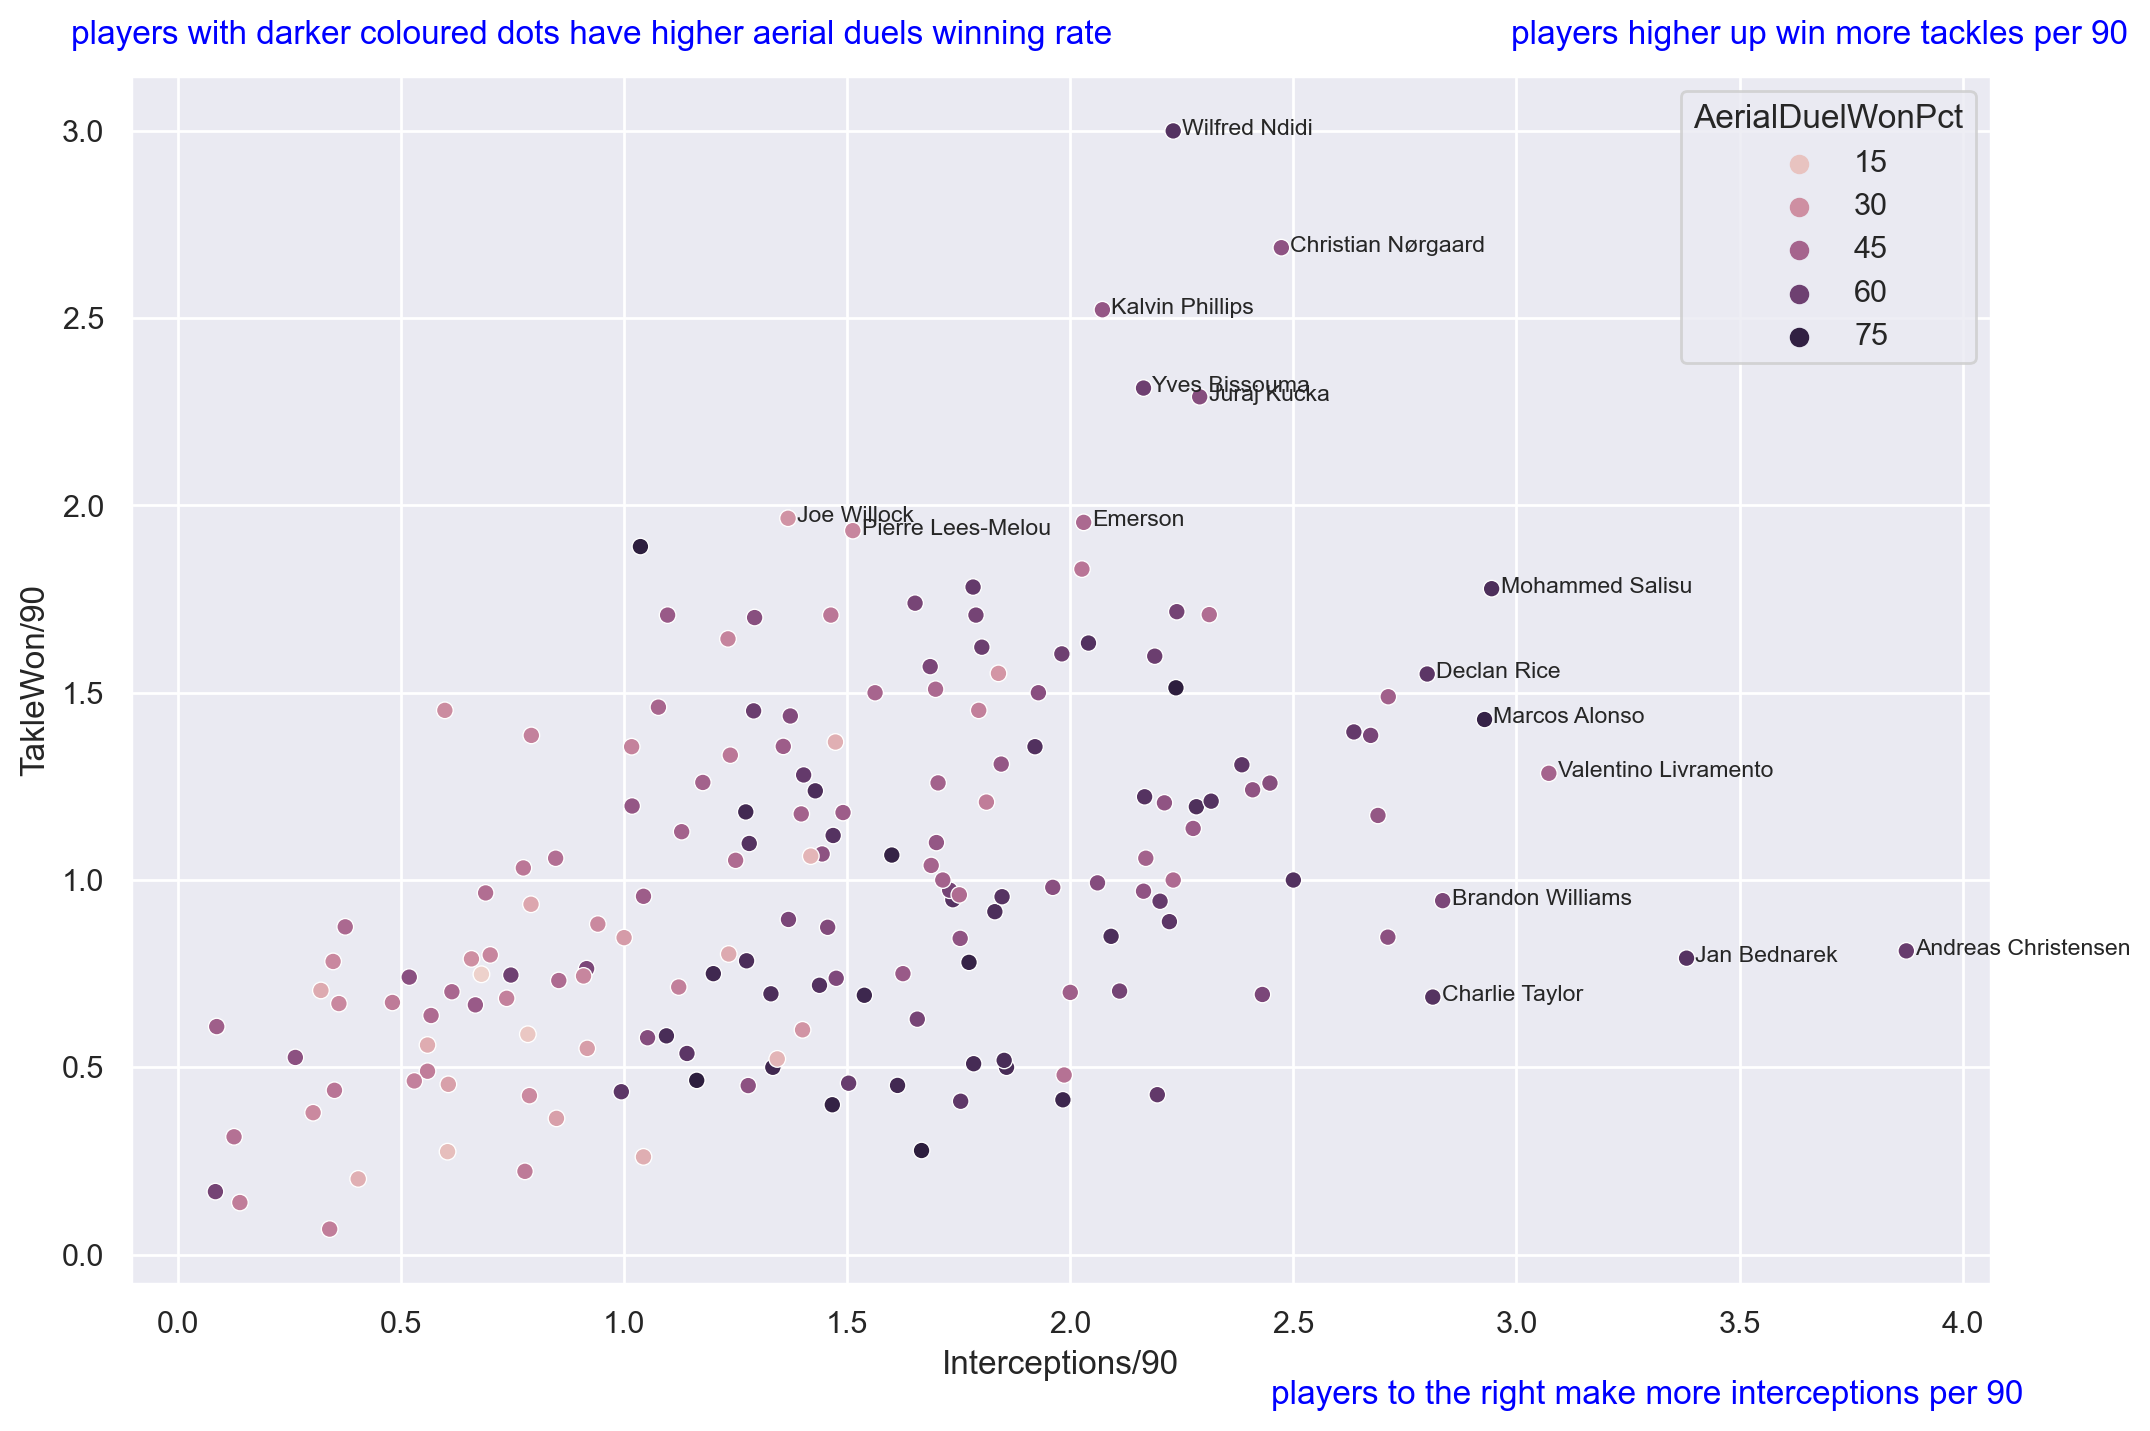

In [8]:
fig = plt.figure(figsize=(12,8), dpi=200)

sns.set_theme()
ax = sns.scatterplot(data=df, x='Interceptions/90',y='TakleWon/90', hue='AerialDuelWonPct')

top_players = [x for x in df.sort_values('Interceptions/90', ascending=False)['Player'].head(8)]
top_players = top_players + [x for x in df.sort_values('TakleWon/90', ascending=False)['Player'].head(8)]
for player in top_players:
    plt.text(x=df['Interceptions/90'][df['Player']==player]+0.02, 
             y=df['TakleWon/90'][df['Player']==player]-0.01,
             s=player,size='x-small')
plt.text(x=0.6,y=0.05,transform=fig.transFigure,
         s = 'players to the right make more interceptions per 90', color='blue')
plt.text(x=0.7,y=0.9,transform=fig.transFigure,
         s = 'players higher up win more tackles per 90', color='blue')
plt.text(x=0.1,y=0.9,transform=fig.transFigure,
         s = 'players with darker coloured dots have higher aerial duels winning rate', color='blue')
fig.savefig('defender.png')

### Goalkeeper Performance

This graphs shows the best goalkeepers and their style(active or passive)

In [12]:
gk = pd.read_csv('keeper.txt', delimiter='|', index_col='Rk')

In [13]:
gk.head()

,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,GA,PKA,...,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Matches,Unnamed: 35
Rk,,,,,,,,,,,,,,,,,,,,,
1,NaN,Alisson,br BRA,GK,Liverpool,29-103,1992,18.0,16,0,...,43.4,38.4,127,13,10.2,26,1.44,17.0,Matches,NaN
2,NaN,Kepa Arrizabalaga,es ESP,GK,Chelsea,27-102,1994,1.0,0,0,...,0.0,9.3,8,1,12.5,1,1.00,18.8,Matches,NaN
3,NaN,Daniel Bachmann,at AUT,GK,Watford,27-188,1994,10.0,23,3,...,69.3,51.6,100,3,3.0,7,0.70,13.6,Matches,NaN
4,NaN,Asmir Begovic,ba BIH,GK,Everton,34-207,1987,1.0,3,0,...,66.7,49.6,5,1,20.0,0,0.00,15.0,Matches,NaN
5,NaN,Jack Butland,eng ENG,GK,Crystal Palace,28-309,1993,2.0,5,0,...,47.6,40.8,19,0,0.0,1,0.50,13.6,Matches,NaN


In [14]:
gk = gk[['Player', 'Squad', '90s','PSxG', 'PSxG/SoT',
         '/90','Cmp%', 'Stp%', '#OPA/90']]# Keep only relevant columns

In [15]:
gk = gk[gk['90s']>=10] # Select only players who have played 10 full games or more

In [16]:
gk.columns = ['Player', 'Squad', '90s', 'PSxG', 'PSxG/SoT', 'SavedxG/90', 'Cmp%', 'Stp%',
       'Sweeps/90'] # Rename some columns for easier understanding

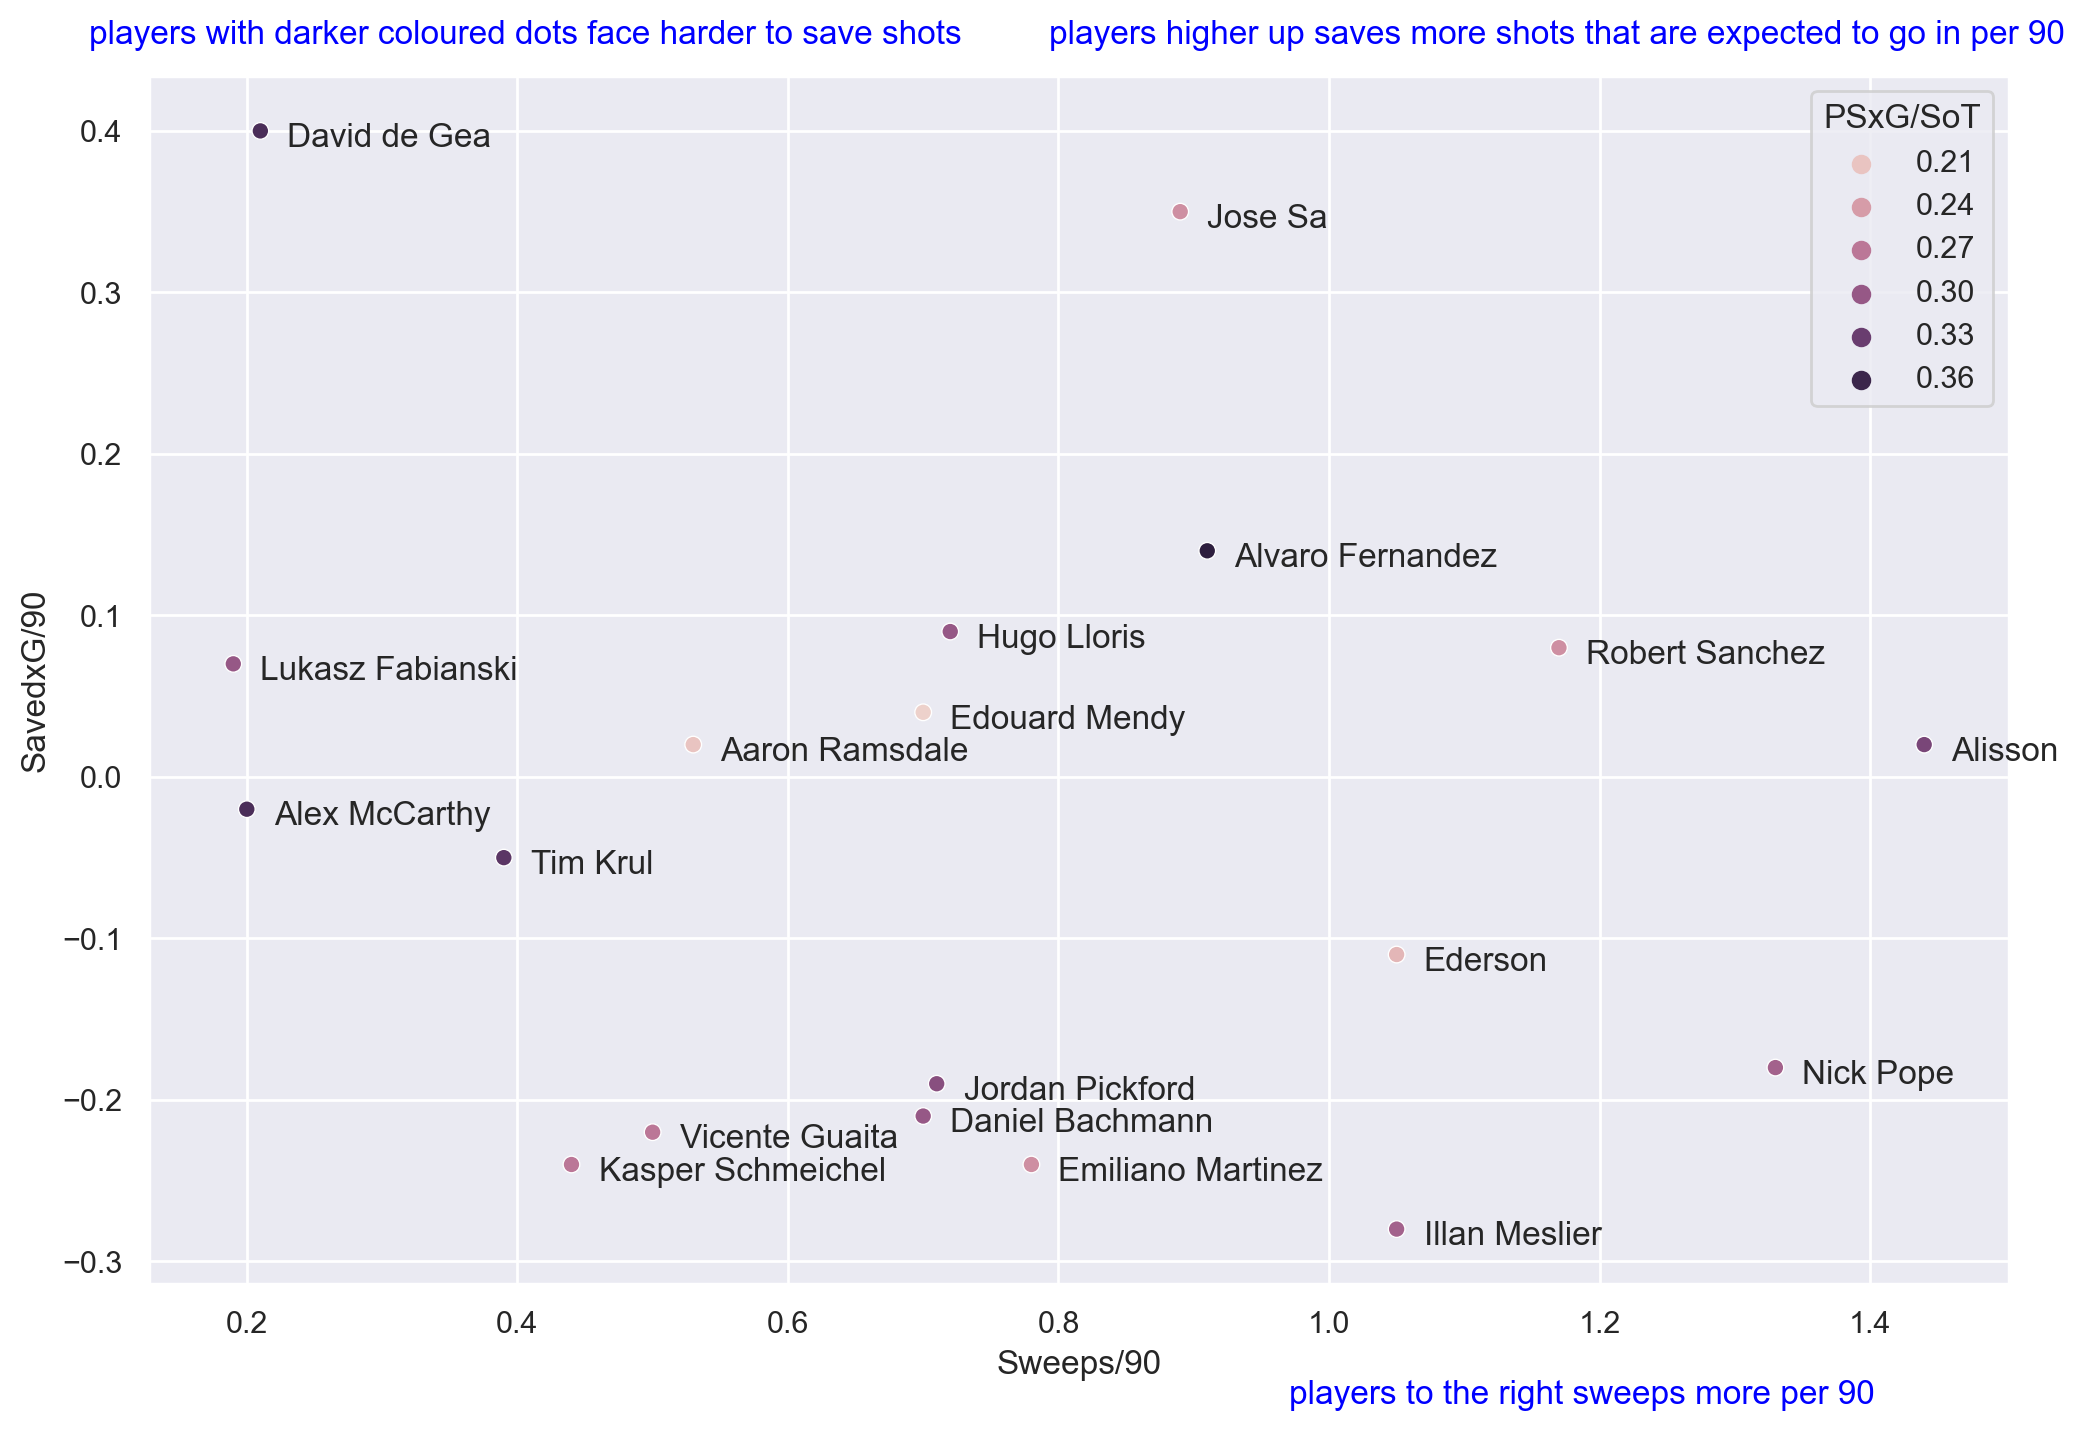

In [17]:
fig = plt.figure(figsize=(12,8), dpi=200)

sns.set_theme()
ax = sns.scatterplot(data=gk, x='Sweeps/90',y='SavedxG/90', hue='PSxG/SoT')
# sns.move_legend(ax, loc='upper left')

top_players = gk['Player']
for player in top_players:
    plt.text(x=gk['Sweeps/90'][gk['Player']==player]+0.02, 
             y=gk['SavedxG/90'][gk['Player']==player]-0.01,
             s=player)
plt.text(x=0.6,y=0.05,transform=fig.transFigure,
         s = 'players to the right sweeps more per 90', color='blue')
plt.text(x=0.5,y=0.9,transform=fig.transFigure,
         s = 'players higher up saves more shots that are expected to go in per 90', color='blue')
plt.text(x=0.1,y=0.9,transform=fig.transFigure,
         s = 'players with darker coloured dots face harder to save shots', color='blue')
# fig.savefig('keeper.png')